- The objective of this case study is to predict the employee salary based on the number of years of experience. 
- In simple linear regression, we predict the value of one variable Y based on another variable X.

In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
# read the csv file 
salary_df = pd.read_csv('salary.csv')

In [9]:
salary_df

YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872
30             11.2  127345
31             11.5  126756
32             12.3  128765
33             12.9  135675
34             13.5  139465

In [12]:
salary_df.head(7)
salary_df.tail(7)

YearsExperience  Salary
28             10.3  122391
29             10.5  121872
30             11.2  127345
31             11.5  126756
32             12.3  128765
33             12.9  135675
34             13.5  139465

In [13]:
salary_df['Salary'].max()

139465

<Axes: >

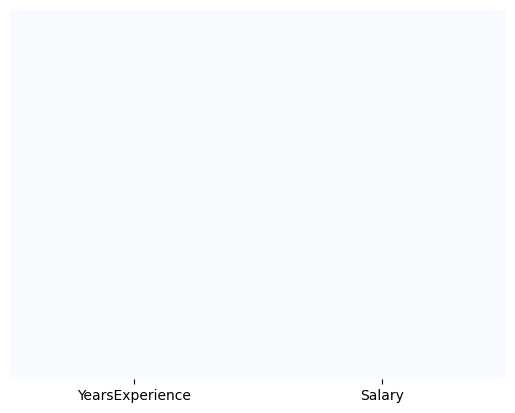

In [14]:
# check if there are any Null values
sns.heatmap(salary_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [15]:
# Check the dataframe info

salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [16]:
# Statistical summary of the dataframe

salary_df.describe()

YearsExperience         Salary
count        35.000000      35.000000
mean          6.308571   83945.600000
std           3.618610   32162.673003
min           1.100000   37731.000000
25%           3.450000   57019.000000
50%           5.300000   81363.000000
75%           9.250000  113223.500000
max          13.500000  139465.000000

MINI CHALLENGE
 - What are the number of years of experience corresponding to employees with minimum and maximim salaries?

In [22]:
min = salary_df[salary_df['Salary'] == salary_df['Salary'].min()]
min['YearsExperience']

2    1.5
Name: YearsExperience, dtype: float64

array([[<Axes: title={'center': 'YearsExperience'}>,
        <Axes: title={'center': 'Salary'}>]], dtype=object)

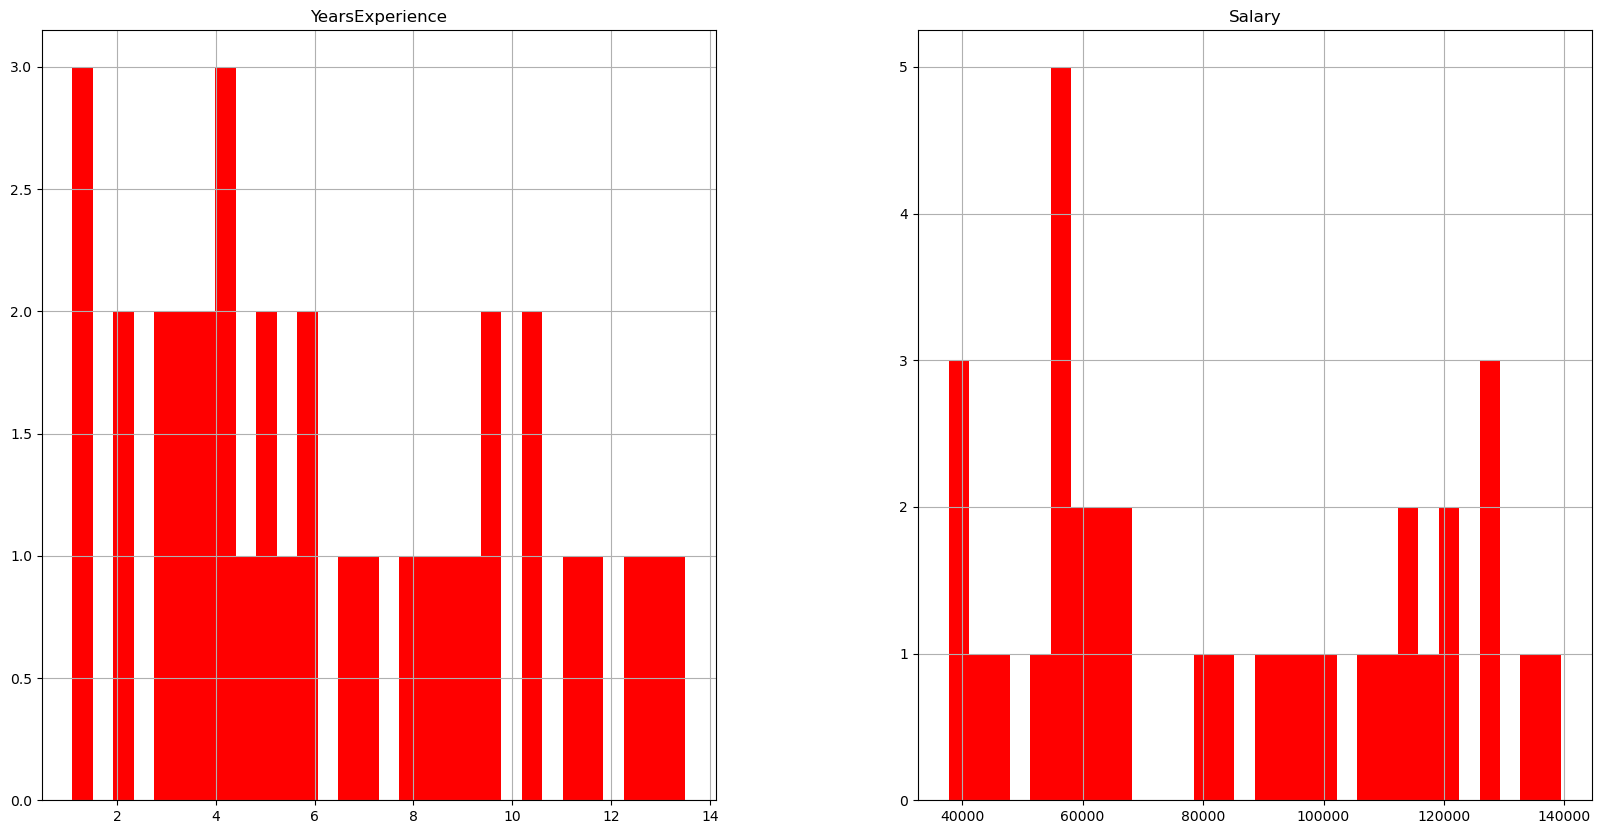

In [23]:
salary_df.hist(bins = 30, figsize = (20,10), color = 'r')


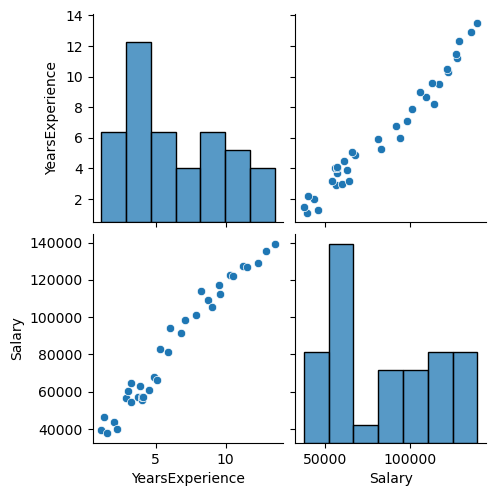

In [24]:
# plot pairplot

sns.pairplot(salary_df)

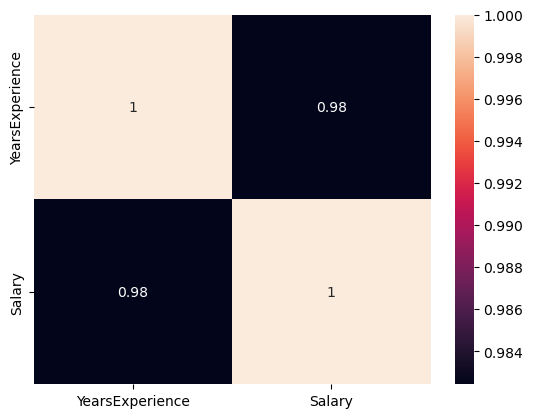

In [25]:
corr_matrix = salary_df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

MINI CHALLENGE
- Use regplot in Seaborn to obtain a straight line fit between "salary" and "years of experience"

<Axes: xlabel='YearsExperience', ylabel='Salary'>

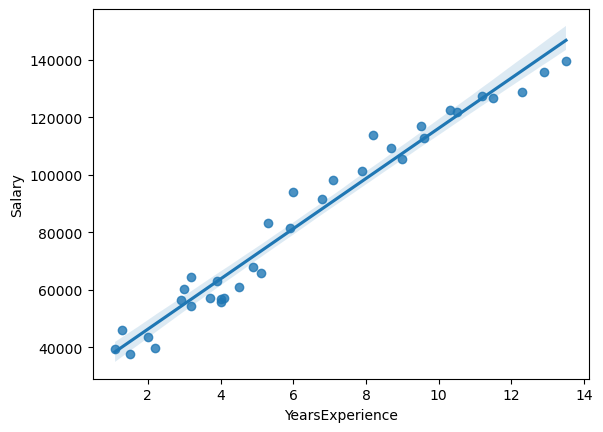

In [26]:
sns.regplot(x = "YearsExperience", y = "Salary", data = salary_df)

# TASK #4: CREATE TRAINING AND TESTING DATASET

In [28]:
X = salary_df[['YearsExperience']]
y = salary_df[['Salary']]


In [29]:
X

YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5
30             11.2
31             11.5
32             12.3
33             12.9
34             13.5

In [30]:
y

Salary
0    39343
1    46205
2    37731
3    43525
4    39891
5    56642
6    60150
7    54445
8    64445
9    57189
10   63218
11   55794
12   56957
13   57081
14   61111
15   67938
16   66029
17   83088
18   81363
19   93940
20   91738
21   98273
22  101302
23  113812
24  109431
25  105582
26  116969
27  112635
28  122391
29  121872
30  127345
31  126756
32  128765
33  135675
34  139465

In [31]:
X.shape

(35, 1)

In [32]:
y.shape

(35, 1)

In [33]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [34]:
# Only take the numerical variables and scale them
X 

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5],
       [11.2],
       [11.5],
       [12.3],
       [12.9],
       [13.5]], dtype=float32)

In [42]:
# split the data into test and train sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [43]:
X_train.shape


(26, 1)

In [44]:
X_test.shape

(9, 1)

In [51]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regresssion_model_sklearn = LinearRegression(fit_intercept = True)
regresssion_model_sklearn.fit(X_train, y_train)


LinearRegression()

In [52]:
regresssion_model_sklearn_accuracy = regresssion_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.9615447742368606

In [53]:
print('Linear Model Coefficient (m): ', regresssion_model_sklearn.coef_)
print('Linear Model Coefficient (b): ', regresssion_model_sklearn.intercept_)

Linear Model Coefficient (m):  [[8737.129]]
Linear Model Coefficient (b):  [28563.652]


In [54]:
y_predict = regresssion_model_sklearn.predict(X_test)

In [55]:
y_predict

array([[ 56522.465],
       [126419.5  ],
       [120303.5  ],
       [ 80986.42 ],
       [112440.09 ],
       [ 71375.586],
       [ 63512.168],
       [129040.64 ],
       [ 56522.465]], dtype=float32)

Text(0.5, 1.0, 'Salary vs. Years of Experience')

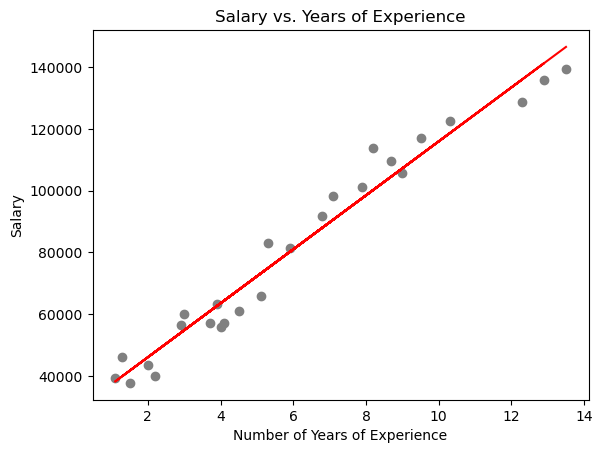

In [56]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regresssion_model_sklearn.predict(X_train), color = 'red')
plt.ylabel('Salary')
plt.xlabel('Number of Years of Experience')
plt.title('Salary vs. Years of Experience')

MINI CHALLENGE
 - Use the trained model, obtain the salary corresponding to eployees who have years of experience = 5

In [59]:
num_years_exp = [[5]]

In [60]:
salary = regresssion_model_sklearn.predict(num_years_exp)
salary

array([[72249.296875]])

In [61]:
import sagemaker
import boto3
from sagemaker import Session

sagemaker_session = sagemaker.Session()
bucket = Session().default_bucket()
bucket = 'sagemaker-practical-debarshi'
prefix = 'linear_learner'

role = sagemaker.get_execution_role()
print(role)

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
arn:aws:iam::324037300296:role/service-role/AmazonSageMaker-ExecutionRole-20240818T132642


In [62]:
X_train.shape

(26, 1)

In [63]:
y_train = y_train[:,0]

In [64]:
y_train.shape

(26,)

In [70]:
import io
import numpy as np
import sagemaker.amazon.common as smac # sagemaker common libary

buf = io.BytesIO()
smac.write_numpy_to_dense_tensor(buf, X_train, y_train)
buf.seek(0)

0

In [71]:
import os

# Code to upload RecordIO data to S3
 
key = 'linear-train-data'

boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train', key)).upload_fileobj(buf)

s3_train_data = 's3://{}/{}/train/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_train_data))

uploaded training data location: s3://sagemaker-practical-debarshi/linear_learner/train/linear-train-data


In [72]:
X_test.shape

(9, 1)

In [73]:
y_test.shape

(9, 1)

In [74]:
# Make sure that the target label is a vector
y_test = y_test[:,0]


In [75]:
# Code to upload RecordIO data to S3

buf = io.BytesIO() # create an in-memory byte array (buf is a buffer I will be writing to)
smac.write_numpy_to_dense_tensor(buf, X_test, y_test)
buf.seek(0) 
# When you write to in-memory byte arrays, it increments 1 every time you write to it
# Let's reset that back to zero 


0

In [76]:
key = 'linear-test-data'

# The following code uploads the data in record-io format to S3 bucket to be accessed later for training
boto3.resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'test', key)).upload_fileobj(buf)

# Let's print out the testing data location in s3
s3_test_data = 's3://{}/{}/test/{}'.format(bucket, prefix, key)
print('uploaded training data location: {}'.format(s3_test_data))

uploaded training data location: s3://sagemaker-practical-debarshi/linear_learner/test/linear-test-data


In [77]:
# create an output placeholder in S3 bucket to store the linear learner output

output_location = 's3://{}/{}/output'.format(bucket, prefix)
print('Training artifacts will be uploaded to: {}'.format(output_location))

Training artifacts will be uploaded to: s3://sagemaker-practical-debarshi/linear_learner/output


In [84]:
# This code is used to get the training container of sagemaker built-in algorithms
# all we have to do is to specify the name of the algorithm, that we want to use

# Let's obtain a reference to the linearLearner container image
# Note that all regression models are named estimators
# You don't have to specify (hardcode) the region, get_image_uri will get the current region name using boto3.Session

from sagemaker.amazon.amazon_estimator import get_image_uri

container = get_image_uri(boto3.Session().region_name, 'linear-learner')


The method get_image_uri has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [87]:
# We have pass in the container, the type of instance that we would like to use for training 
# output path and sagemaker session into the Estimator. 
# We can also specify how many instances we would like to use for training
# sagemaker_session = sagemaker.Session()

linear = sagemaker.estimator.Estimator(container,
                                       role, 
                                       train_instance_count = 1, 
                                       train_instance_type = 'ml.c4.xlarge',
                                       output_path = output_location,
                                       sagemaker_session = sagemaker_session, 
                                       train_use_spot_instances = True, 
                                       train_max_run = 300,
                                       train_max_wait = 600)


# We can tune parameters like the number of features that we are passing in, type of predictor like 'regressor' or 'classifier', mini batch size, epochs
# Train 32 different versions of the model and will get the best out of them (built-in parameters optimization!)

linear.set_hyperparameters(feature_dim = 1,
                           predictor_type = 'regressor',
                           mini_batch_size = 5,
                           epochs = 5,
                           num_models = 32,
                           loss = 'absolute_loss')

# Now we are ready to pass in the training data from S3 to train the linear learner model

linear.fit({'train': s3_train_data})

# Let's see the progress using cloudwatch logs

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
INFO:sagemaker:Creating training-job with name: linear-learner-2024-08-19-02-29-48-834


2024-08-19 02:29:48 Starting - Starting the training job...
2024-08-19 02:30:04 Starting - Preparing the instances for training...
2024-08-19 02:30:43 Downloading - Downloading input data......
2024-08-19 02:31:24 Downloading - Downloading the training image......
2024-08-19 02:32:45 Training - Training image download completed. Training in progress...Docker entrypoint called with argument(s): train
Running default environment configuration script
[08/19/2024 02:32:55 INFO 139966013241152] Reading default configuration from /opt/amazon/lib/python3.8/site-packages/algorithm/resources/default-input.json: {'mini_batch_size': '1000', 'epochs': '15', 'feature_dim': 'auto', 'use_bias': 'true', 'binary_classifier_model_selection_criteria': 'accuracy', 'f_beta': '1.0', 'target_recall': '0.8', 'target_precision': '0.8', 'num_models': 'auto', 'num_calibration_samples': '10000000', 'init_method': 'uniform', 'init_scale': '0.07', 'init_sigma': '0.01', 'init_bias': '0.0', 'optimizer': 'auto', 'loss

In [88]:
# Deploying the model to perform inference 

linear_regressor = linear.deploy(initial_instance_count = 1,
                                          instance_type = 'ml.m4.xlarge')

INFO:sagemaker:Creating model with name: linear-learner-2024-08-19-02-36-27-708
INFO:sagemaker:Creating endpoint-config with name linear-learner-2024-08-19-02-36-27-708
INFO:sagemaker:Creating endpoint with name linear-learner-2024-08-19-02-36-27-708


--------!

In [89]:
from sagemaker.predictor import csv_serializer, json_deserializer

#Pass in text in csv format

linear_regressor.content_type = 'text/csv'
linear_regressor.serializer = csv_serializer
linear_regressor.deserializer = json_deserializer

ImportError: cannot import name 'csv_serializer' from 'sagemaker.predictor' (/opt/conda/lib/python3.10/site-packages/sagemaker/predictor.py)

In [ ]:
# making prediction on the test data

result = linear_regressor.predict(X_test)

In [ ]:
result #Json format

In [ ]:
# Since the result is in json format, we access the scores by iterating through the scores in the predictions

predictions = np.array([r['score'] for r in result['predictions']])

In [ ]:
predictions

In [57]:
predictions.shape

(7,)

Text(0.5, 1.0, 'Salary vs. Years of Experience')

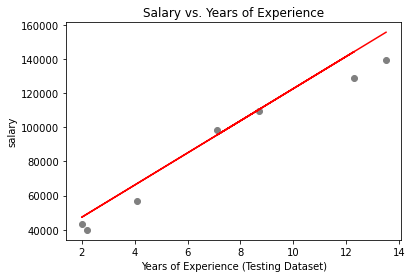

In [58]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, predictions, color = 'red')
plt.xlabel('Years of Experience (Testing Dataset)')
plt.ylabel('salary')
plt.title('Salary vs. Years of Experience')

In [59]:
# Delete the end-point

linear_regressor.delete_endpoint()